## **1.Installation**
*   tensorflow==2.5.0



In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

Install Mask R-CNN

In [1]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2022-12-08 05:41:03--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.01s   

2022-12-08 05:41:04 (4.80 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py 

/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


## **2. Image Dataset**

Load your annotated dataset

Mounting GDrive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Extract Images
images_path = "/content/gdrive/MyDrive/Segmentation/dataset.zip"
annotations_path = "/content/gdrive/MyDrive/Segmentation/annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 82 images


In [9]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/gdrive/MyDrive/Segmentation/annotations.json
Annotation json path:  /content/gdrive/MyDrive/Segmentation/annotations.json
Train: 73
Validation: 9
Classes: 1


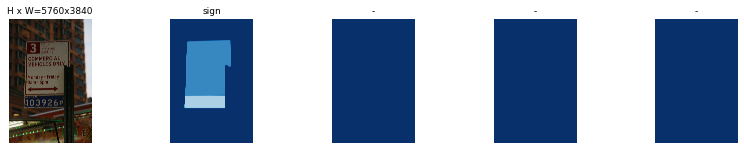

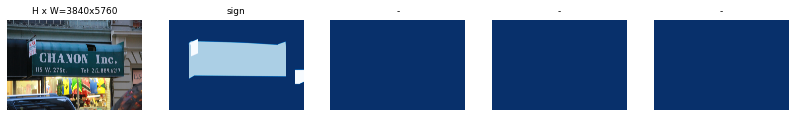

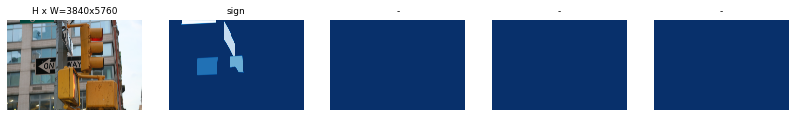

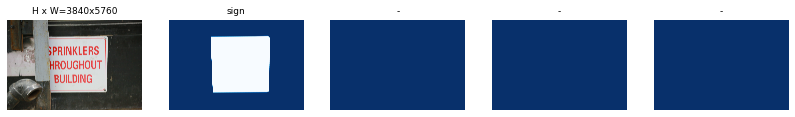

In [10]:
# Load image samples
display_image_samples(dataset_train)

## **3.Training**

Train Mask RCNN on your custom Dataset.

In [14]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)

Saving to HTML 

In [16]:
%%shell
jupyter nbconvert --to html "/content/Segmentation.ipynb"

[NbConvertApp] WARNING | pattern '/content/Segmentation.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e

CalledProcessError: ignored